### 导入module

In [2]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import scipy.signal as signal
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20, 8)
%matplotlib inline

### 数据获取

In [4]:


def get_data(path):
    fulldata= []
    txt_path = path
    txt_list=os.listdir(txt_path)
    features_list=[]
    for txt in txt_list:
        if txt[-4:]=='.csv':
#             this_path=os.path.join(txt_path,txt)
#             data = pd.read_csv(this_path,error_bad_lines=False)
            # PCA
#             dd = data[['awRR','NBP (Sys)','NBP (Dia)','ECG']]

            this_path=os.path.join(txt_path,txt)
#             print(this_path)
            data = pd.read_csv(this_path, index_col=False)
            # PCA
            dd = data[['NBP (Sys)','NBP (Dia)','NBP (Mean)','Pleth']]
            fulldata.append(dd)




    sum_ = fulldata[0]

    for x in range(1,len(fulldata)):
        sum_ = pd.concat([sum_, fulldata[x]],axis=0).reset_index(drop=True)


    sum_ = sum_.dropna(axis=0,how='any')
    return sum_
# path = r'D:\textbook\大三上\项目\data\uqvitalsignsdata\case09\fulldata'
# sum_ = get_data(path)
path = r'D:\textbook\大三上\项目\data\uqvitalsignsdata\case01\fulldata'
data_sum = get_data(path)
# for x in range(2,10):
#     path = r'D:\textbook\大三上\项目\data\uqvitalsignsdata\case'+str(x).zfill(2)+'\\fulldata'
#     temp_data = get_data(path)
#     data_sum = pd.concat([data_sum, temp_data],axis=0).reset_index(drop=True)
sum_ = data_sum
print(sum_.shape)

(690788, 4)


In [3]:
# sum传递给特征提取
sum_.head()

,NBP (Sys),NBP (Dia),NBP (Mean),Pleth
3789,113.0,60.0,72.0,0.47766
3790,113.0,60.0,72.0,0.47790
3791,113.0,60.0,72.0,0.47814
3792,113.0,60.0,72.0,0.47839
3793,113.0,60.0,72.0,0.47863


In [4]:
sum_.tail()

,NBP (Sys),NBP (Dia),NBP (Mean),Pleth
729595,106.0,63.0,72.0,0.49988
729596,106.0,63.0,72.0,0.49988
729597,106.0,63.0,72.0,0.49988
729598,106.0,63.0,72.0,0.49988
729599,106.0,63.0,72.0,0.49988


### 特征提取

In [5]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import scipy.signal as signal


# 插值函数 
def insert_values(x, y):
    xx = np.linspace(x.min(), x.max(), 10*len(y))
    f = interp1d(x, y, kind = 7)
    return f(xx)

def chachi(x, y):
    xx = np.linspace(x.min(), x.max(), 10*len(y))
    f = interp1d(x, y, kind = 7)
    return f(xx)


# 开运算
def open_demo(data_res):
    G1 = np.ones((1,10))
    G2 = np.ones((1,2))
    G1_ = np.ones((1,10))
    G2_ = np.ones((1,2))
    
    b = data_res
    dst_new = (cv.morphologyEx(data_res,cv.MORPH_OPEN,G1))
    dst_new = (cv.morphologyEx(dst_new,cv.MORPH_CLOSE,G2))
    
    a = np.array(dst_new.T[2000:3000])

    #plt.plot(list(range(1000)), b[0][2000:3000], color='b')
    #plt.plot(list(range(1000)), dst.T[2000:3000], color='r')
    
#     print(data_res.shape)
    data_res = np.array(data_res[0]).reshape(len(data_res[0]), 1)
    dst_new = dst_new.T
    dst_final = (data_res-dst_new)
    dst_final.reshape(1,len(dst_final))
    i_line = (cv.morphologyEx(dst_final,cv.MORPH_CLOSE, G1))
    i_line = (cv.morphologyEx(i_line,cv.MORPH_OPEN, G2))
    i_line = i_line.T
    dst_final = dst_final.reshape((len(dst_final), ))
    data_res_inserted = insert_values(np.array(list(range(len(dst_final)))), dst_final)
    i_line = i_line.reshape((i_line.shape[1], ))
    i_line_inserted = insert_values(np.array(list(range(len(i_line)))), i_line)
#     plt.plot(list(range(len(data_res_inserted))), (data_res_inserted), color='black')
#     plt.plot(list(range(len(i_line_inserted))), (i_line_inserted), color='blue')
    
#   
    
    
   #原始代码
    
#     b = np.array(b[0][2000:3000])
# #     a = np.array(dst.T[2000:3000])
#     b = b.reshape(1000,1)
#     c = (b-a)[18:138]
#     c = c.reshape(1,120)

#     D = (cv.morphologyEx(c,cv.MORPH_CLOSE,G1))
#     D = (cv.morphologyEx(D,cv.MORPH_OPEN,G2))
#     D = (D.T)
# #     print(type(c))
#     c = c.reshape(120,)
    
#     data = chazhi(np.array(list(range(len(c)))),c)  #插值后的PPG信号
#     D = D.reshape(120,)
#     D_cha = chazhi(np.array(list(range(len(D)))),D)    #插值后的包络线
#原始代码

    data = data_res_inserted
    D_cha = i_line_inserted

    
# #     data_inserted = data.reshape(1, 1200)
#     D_ = (cv.morphologyEx(data_inserted, cv.MORPH_CLOSE, G1))
#     D_ = (cv.morphologyEx(D_, cv.MORPH_OPEN, G2))
#     D_ = D_.reshape((1200,))
    
# 原始画图
#     plt.plot(list(range(1200)), (data), color='black')
#     plt.plot(list(range(1200)), (D_cha), color='blue')



#     plt.plot(list(range(1200)), (D_), color='pink')


    # 求波峰
    feng = data[signal.argrelextrema(data, np.greater)]
    index = (signal.argrelextrema(data, np.greater))[0]
    feng = list(feng)
    index = list(index)
    o = []
    for i in range(len(feng)):
        if feng[i]<0.9*D_cha[index[i]]:
            o.append(i)
    cnt = 0
    for i in o:
#         print(i)
        del(feng[i - cnt])
        del(index[i - cnt])
        cnt+=1
#     del(feng[-1])
#     del(index[-1])

#     plt.plot(index, feng, 'o')
    
    # 寻起点
   
    starts = []
    for x in range(len(index) - 1):
        # print(index[x], index[x+1])
        o = []
        for y in list(data[index[x] : index[x + 1]]):
            o.append(float(y))
        indx = index[x + 1]
        # print(np.diff([x for x in range(index[x],indx)]))
        for _ in range(3):
            o = np.diff(o) / np.diff([x for x in range(index[x], indx)])
            indx = indx - 1
        # 波峰中点到三阶导数的最小值之间，三阶导数的最大值处
#         for _ in range(3):
#             o.append(o[len(o)-1])
        three_deri.append(o)
    
#         plt.plot(list(range(index[x],index[x]+len(o))),o*100,color ='lightgreen')
        try:
        
            end = list(o).index(min(o))
            mid_peak = (index[x]+index[x+1])//2 - index[x]
#         list(o).index(max(o[mid_peak: end]))+index[x]
        # end, mid_peak

#             starts.append(data[index[x] + list(o).index(max(o))])
#             starts_index.append(index[x] + list(o).index(max(o)))
            starts.append(data[list(o).index(max(o[mid_peak: end]))+index[x]])
            starts_index.append(list(o).index(max(o[mid_peak: end]))+index[x])
            
        except:
            starts.append(min(data[index[x] : index[x+1]]))
            starts_index.append(index[x]+list(data[index[x] : index[x+1]]).index(min(data[index[x] : index[x+1]]))) 
            
            
            
#     plt.plot(starts_index, starts, 'o', color='r', linewidth=10)
    
#     plt.plot(list(range(three_deri)), three_deri)
    # plt.plot(peakutils.index(-x),x[peakutils.index(-x)],'*')
    
    # 求33  利用波峰和起点计算
    t_start_peak = 0
    for i,value in enumerate(index):
        if value > starts_index[0]:
            t_start_peak=i
#             print(value,starts_index[0])
            break
    index_peak = index[t_start_peak:]
    
    
#     print(len(index_peak),len(starts_index))
#     for i,j in zip(starts_index, index_peak):
#         print(i<j)
        
        
        
    for start, peak in zip(starts_index, index_peak):
        h_33 = abs(data[peak]-data[start])*0.33
        for index_,value in enumerate(data[start: peak]):
            temp_index=0
            if abs(h_33-(value-data[start])) <= thres_33:
                index_33.append(start+index_)
                value_33.append(value)
                break
            else:
                temp_index = (peak-start)//2
                index_33.append((start+temp_index))
                value_33.append(data[start+temp_index])
                break
#     plt.plot(index_33, value_33,'o', linewidth=10)
#     plt.plot(list(range(temp_f.shape[0])),temp_f)

    # 特征：
    for x in range(len(starts_index)-1):
        tc = 1/((starts_index[x+1]-starts_index[x])*0.01)
        f1.append(tc)
        
    count = 0
#     print(starts_index[0], index_33[0], index_peak[0])
#     print(starts_index[1], index_33[1], index_peak[1])
#     print(len(starts_index),len(index_33),len(index_peak))
#     print(f1)
#     print('*'*100)
    
    for start,i_33,peak in zip(starts_index, index_33, index_peak):
#         print(start,i_33,peak)
#         print('-'*100)
        tc = f1[count]
        ts = (peak-start)*0.01
        ts33 = (i_33-start)*0.01
        index_ts33.append(ts33)
        f2.append((ts-ts33)/tc)
        
        if count < len(f1)-1:
            count+=1
        else:
            break
            
            
    #33new  起点和波峰之间插值  ， 没有使用
#     for start,peak in zip(starts_index, index_peak):
#         insert = data[start:peak]
#         try:
#             insert_data = chazhi(np.array(list(range(len(insert)))), insert)
#             insert_data = chazhi(np.array(list(range(len(insert_data)))), insert_data)
#             h_33 = abs(data[peak]-data[start])*0.33
#             start_list.append(data[start])
#             peak_list.append(data[peak])
#             for index_,value in enumerate(insert_data):
#                 if abs(h_33-(value-data[start]))<=thres_new_33:
#                     index_new_33.append(index_*0.0001)
#                     value_new_33.append(value)
#                     break
#         except:
#             pass
#     plt.show()

    return data, index, feng


    #cv.imshow("before",binary)
    #cv.imshow("deode_demo",dst)

    # 闭运算
def close_demo(image):
#     print(image.shape)
    gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    ret,binary = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV | cv.THRESH_OTSU)
    kernel = cv.getStructuringElement(cv.MORPH_RECT,(5,5))
    dst = cv.morphologyEx(binary,cv.MORPH_OPEN,kernel)
    cv.imshow("before",binary)
    cv.imshow("deode_demo",dst)


    # 给数据  此时需保证数据处理完毕  
dd = []
ff = []
index_final = []
for x in range(1,sum_.shape[0]//50000+1):

    three_deri = []

    # 一次插值
    index_33 = []
    value_33 = []
    thres_33 = 0.01
    # 两次插值 （起点和波峰之间）index_new_33=[]
    index_new_33 = []
    value_new_33 = []
    thres_new_33 = 0.00015

    # 时间33处到起点 
    index_ts33=[]
    start_list=[]
    peak_list=[]
    data_start = ""

    # 起点的下标
    starts_index = []


    # 特征 使用时直接用f1、f2就行
    f1 = []
    f2 = []
    
    df_peak = sum_.iloc[(x-1)*50000:x*50000,:]
    # df = df.dropna(axis = 1)
    times=pd.date_range('20180101',periods=df_peak['Pleth'].shape[0])
    ts=pd.Series(np.array(df_peak['Pleth']), index=times)
    ts_10d=ts.resample('10D').mean() # 降采样
    data_peak = np.array([ts_10d.values])
    final_data, index, feng = open_demo(data_peak)
    
    if x == 1:
        tmp=0
    else:
        tmp = index_final[-1]
    
    for i in range(len(index)):
        index[i] += tmp
        index_final.append(index[i])

    dd.append(f1)
    ff.append(f2)
f1_final = []
f2_final = []
for i,j in zip(dd,ff):
    f1_final.extend(i)
    f2_final.extend(j)

    

In [6]:
len(f1_final)

16415

In [7]:
# 特征获取
f1_new = []
f2_new = []
SBP = [] 
DBP = []
MBP = []
# step可变
step = 1
for x in range(len(f1_final)//step):
    x=x*step
    f1_new.append(np.mean(f1_final[x: x+step]))
    f2_new.append(np.mean(f2_final[x: x+step]))    
    SBP.append(sum_['NBP (Sys)'][index_final[1 + x]:index_final[2+x+step]].mean())
    DBP.append(sum_['NBP (Dia)'][index_final[1 + x]:index_final[2+x+step]].mean())
    MBP.append(sum_['NBP (Mean)'][index_final[1 + x]:index_final[2+x+step]].mean())
    
data_final = pd.DataFrame()
data_final['f1'] = f1_new
data_final['f2'] = f2_new
data_final['SBP'] = SBP
data_final['DBP'] = DBP
data_final['MBP'] = MBP
data_final = data_final.dropna(axis=0,how='any')
data_final.head()

,f1,f2,SBP,DBP,MBP
0,2.222222,0.0450,113.0,60.0,72.0
1,1.694915,0.0767,113.0,60.0,72.0
2,1.136364,0.1232,113.0,60.0,72.0
3,3.125000,0.0448,113.0,60.0,72.0
4,1.333333,0.0750,113.0,60.0,72.0


In [8]:
data_final.isna().sum()

f1     0
f2     0
SBP    0
DBP    0
MBP    0
dtype: int64

### 数据预处理

In [9]:
# 这里我包装了一个异常值处理的代码，可以随便调用。
def outliers_proc(data, col_name, scale=3):
    """
    用于清洗异常值，默认用 box_plot（scale=3）进行清洗
    :param data: 接收 pandas 数据格式
    :param col_name: pandas 列名
    :param scale: 尺度
    :return:
    """

    def box_plot_outliers(data_ser, box_scale):
        """
        利用箱线图去除异常值
        :param data_ser: 接收 pandas.Series 数据格式
        :param box_scale: 箱线图尺度，
        :return:
        """
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up)
        return (rule_low, rule_up), (val_low, val_up)

    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print("Delete number is: {}".format(len(index)))
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
    print("Now column number is: {}".format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the upper bound is:")
    print(pd.Series(outliers).describe())
    
#     fig, ax = plt.subplots(1, 2, figsize=(10, 7))
#     sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
#     sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
    return data_n

In [10]:
Data = data_final.copy()
thres = 2
Data_1 = outliers_proc(Data,'f1',thres)
Data_2 = outliers_proc(Data_1,'f2',thres)
Data_3 = outliers_proc(Data_2,'SBP',thres)
Data_4 = outliers_proc(Data_3,'DBP',thres)
Data_n = outliers_proc(Data_4,'MBP',thres)

Delete number is: 64
Now column number is: 16351
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: f1, dtype: float64
Description of data larger than the upper bound is:
count    64.000000
mean      6.513421
std       0.408467
min       6.250000
25%       6.250000
50%       6.250000
75%       6.666667
max       8.333333
Name: f1, dtype: float64
Delete number is: 427
Now column number is: 15924
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: f2, dtype: float64
Description of data larger than the upper bound is:
count    427.000000
mean       0.144837
std        0.200487
min        0.091000
25%        0.096600
50%        0.106400
75%        0.129000
max        3.681500
Name: f2, dtype: float64
Delete number is: 0
Now column number is: 15924
Description of data less than

In [11]:
Data_n.isna().sum()

f1     0
f2     0
SBP    0
DBP    0
MBP    0
dtype: int64

In [12]:
f1n = []
f2n = []
S= []
D = []
M = []


step = 20
for x in range(Data_n.shape[0]//step):
    x=x*step
    f1n.append(np.mean(Data_n['f1'][x: x+step]))
    f2n.append(np.mean(Data_n['f2'][x: x+step]))    
    S.append(np.mean(Data_n['SBP'][x: x+step]))    
    D.append(np.mean(Data_n['DBP'][x: x+step]))    
    M.append(np.mean(Data_n['MBP'][x: x+step]))    

dataf = pd.DataFrame()
dataf['f1'] = f1n
dataf['f2'] = f2n
dataf['SBP'] = S
dataf['DBP'] = D
dataf['MBP'] = M
# dataf = dataf.dropna(axis=0,how='any')
dataf.head()

,f1,f2,SBP,DBP,MBP
0,2.115315,0.048265,93.0,47.0,58.0
1,2.112546,0.053010,93.0,47.0,58.0
2,2.108894,0.055570,93.0,47.0,58.0
3,2.251224,0.052565,93.0,47.0,58.0
4,2.098418,0.052495,93.0,47.0,58.0


In [13]:
dataf.shape

(652, 5)

In [14]:
dataf.isna().sum()

f1     0
f2     0
SBP    0
DBP    0
MBP    0
dtype: int64

### 模型训练

In [15]:
# 模型训练
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
import numpy as np
from sklearn.externals import joblib
def show_eva(result,test_y):
    print(f"均方误差(MSE)：{mean_squared_error(result, test_y)}")
    print(f"根均方误差(RMSE)：{np.sqrt(mean_squared_error(result, test_y))}")
    print(f"测试集R^2：{r2_score(test_y, result)}")
#     plt.figure(figsize=(20,8))
#     plt.plot(list(range(test_y.shape[0])), test_y, marker='o', color = 'blue')
#     plt.plot(list(range(result.shape[0])), result,marker = '*', color='red')
    
def train_model(data,col_name:str):
    X,y=data.iloc[:,:2],data[col_name]
    X = preprocessing.StandardScaler().fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

    poly_svr = SVR(kernel="rbf")
#     poly_svr = 
    rfr = RandomForestRegressor()
    etr = ExtraTreesRegressor()
    gbr = GradientBoostingRegressor()
    
    
    poly_svr.fit(x_train, y_train)
    poly_svr_y_predict = poly_svr.predict(x_test)
   
    rfr.fit(x_train, y_train)
    rfr_y_predict = rfr.predict(x_test)
   
    etr.fit(x_train, y_train)
    etr_y_predict = etr.predict(x_test)
    
    gbr.fit(x_train, y_train)
    gbr_y_predict = gbr.predict(x_test)
    
#     print('svr')
#     show_eva(poly_svr_y_predict,y_test)
#     print('rfr')
#     show_eva(rfr_y_predict,y_test)
#     print('etr')
#     show_eva(etr_y_predict,y_test)z真实值
#     print('gbr')
#     show_eva(gbr_y_predict,y_test)
#     joblib.dump(poly_svr, col_name+"_model.m")
#     print(poly_svr_y_predict)
    test_y = y_test
    result = poly_svr_y_predict
    print(f"均方误差(MSE)：{mean_squared_error(result, test_y)}")
    print(f"根均方误差(RMSE)：{np.sqrt(mean_squared_error(result, test_y))}")
    print(f"测试集R^2：{r2_score(test_y, result)}")
    plt.figure(figsize=(20,8))
    plt.plot(list(range(y_test.shape[0])), y_test, marker='o', color = 'blue',label="Truth")
    plt.plot(list(range(poly_svr_y_predict.shape[0])), poly_svr_y_predict,marker = '*', color='red', label="Predict")
    plt.legend(fontsize=15)
    plt.title(col_name,fontsize=20)
    plt.savefig(col_name)
    return result, test_y

In [16]:
# S_model = joblib.load("SBP_model.m")
# D_model = joblib.load("DBP_model.m")
# M_model = joblib.load("MBP_model.m")

均方误差(MSE)：13.043079943498856
根均方误差(RMSE)：3.6115204476091307
测试集R^2：0.36344482158138314


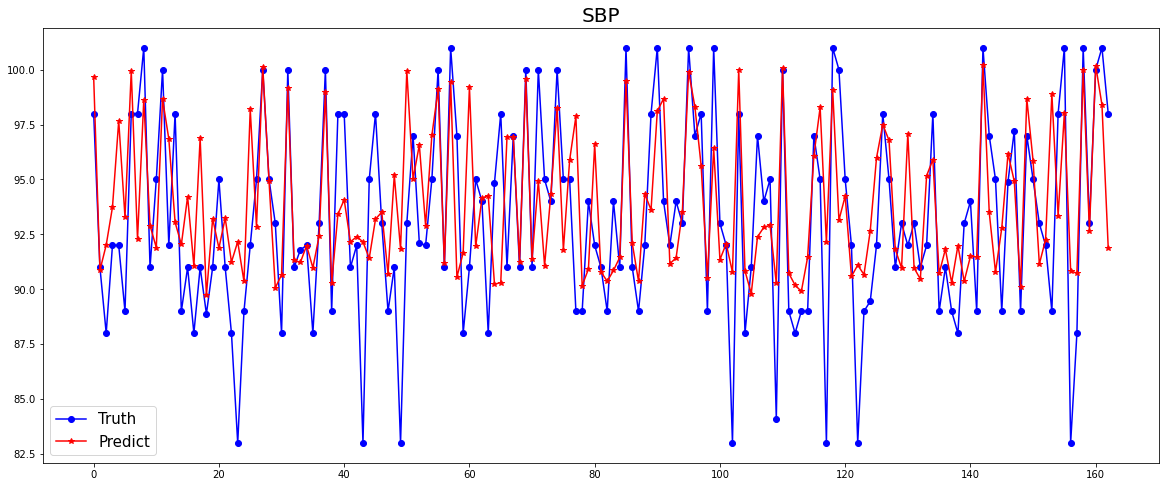

In [17]:
S_pred,S_true= train_model(dataf,'SBP')

均方误差(MSE)：3.959310245178726
根均方误差(RMSE)：1.9898015592462295
测试集R^2：0.2195428669179582


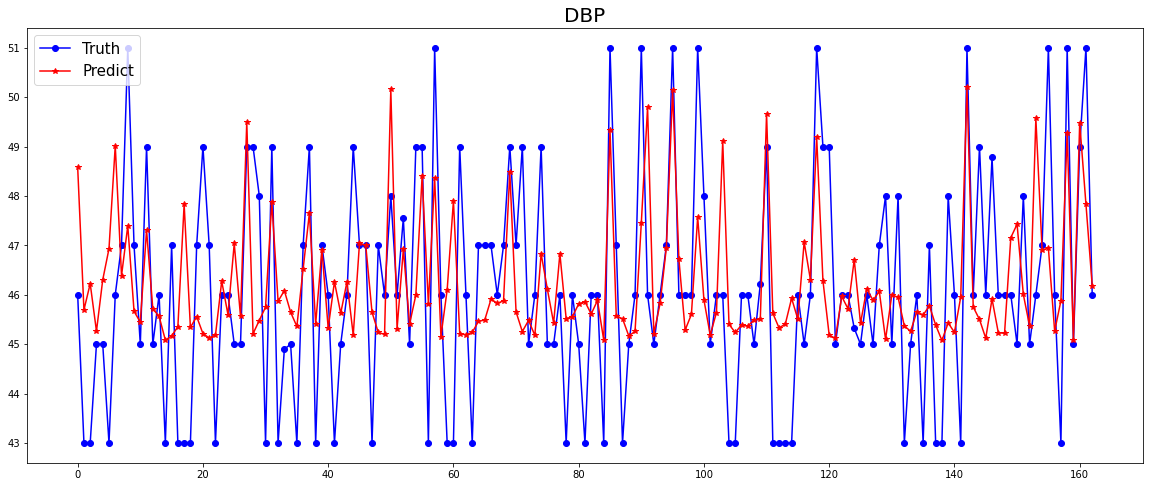

In [18]:
D_pred,D_true = train_model(dataf,'DBP')

均方误差(MSE)：4.911109562981218
根均方误差(RMSE)：2.2161023358548264
测试集R^2：0.4197900107911313


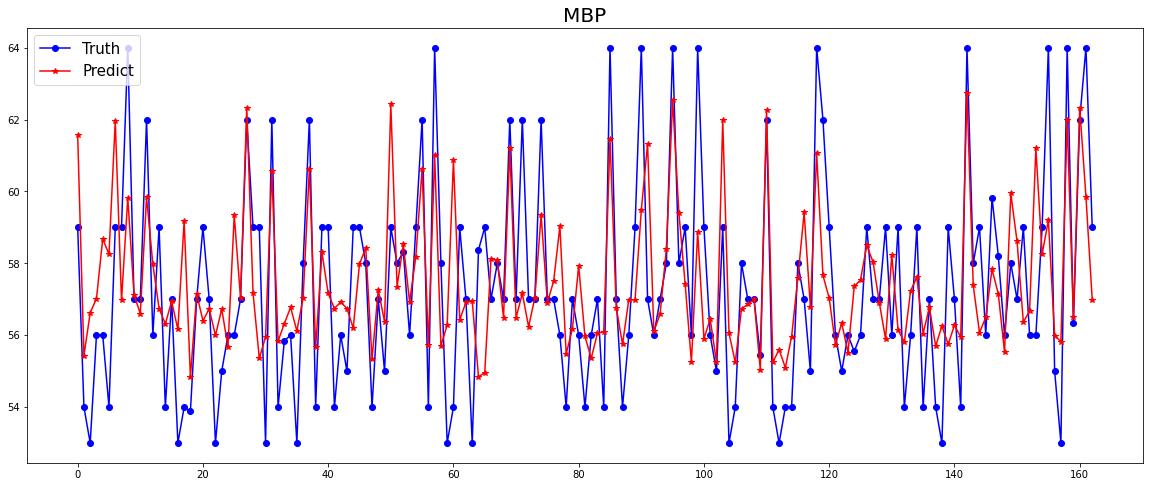

In [19]:
M_pred,M_true= train_model(dataf, 'MBP')

In [20]:
data_out = pd.DataFrame()
data_out['S_pred'] = list(S_pred)
data_out['S_true'] = list(S_true)
data_out['D_pred'] = list(D_pred)
data_out['D_true'] = list(D_true)
data_out['M_pred'] = list(M_pred)
data_out['M_true'] = list(M_true)
data_out.head()

,S_pred,S_true,D_pred,D_true,M_pred,M_true
0,99.651847,98.0,48.580157,46.0,61.562531,59.0
1,90.868838,91.0,45.693701,43.0,55.433675,54.0
2,92.016307,88.0,46.225080,43.0,56.624759,53.0
3,93.736419,92.0,45.264103,45.0,57.017837,56.0
4,97.671651,92.0,46.302506,45.0,58.680900,56.0


In [22]:
writer = pd.ExcelWriter('output.xlsx')
data_out.to_excel(writer)
writer.save()